In [1]:
#import modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# create a path and read by pandas
chart_path = "..\job_census_data_3.csv"
df_chart = pd.read_csv(chart_path)
# show the datafram
df_chart.head(10)

,State Code,State Name,Type,Male,Female,Total
0,1,Alabama,Manufacturing,190949.0,66276.0,257225
1,2,Alaska,Manufacturing,0.0,0.0,0
2,4,Arizona,Manufacturing,129871.0,52836.0,182707
3,5,Arkansas,Manufacturing,107801.0,44928.0,152729
4,6,California,Manufacturing,1020705.0,421201.0,1441906
5,8,Colorado,Manufacturing,125018.0,42920.0,167938
6,9,Connecticut,Manufacturing,119726.0,42914.0,162640
7,10,Delaware,Manufacturing,20941.0,9194.0,30135
8,11,District of Columbia,Manufacturing,0.0,0.0,0
9,12,Florida,Manufacturing,294846.0,110216.0,405062


In [3]:
#find all the job types
print(df_chart["Type"].unique())

['Manufacturing' 'IT' 'Social Workers' 'Finance']


In [4]:
#storing data
#manufacturing
total_manufacturing = df_chart[df_chart["Type"]=="Manufacturing"]["Total"].sum()
total_manufacturing_male = df_chart[df_chart["Type"]=="Manufacturing"]["Male"].sum()
total_manufacturing_female = df_chart[df_chart["Type"]=="Manufacturing"]["Female"].sum()
#IT
total_it = df_chart[df_chart["Type"]=="IT"]["Total"].sum()
total_it_male = df_chart[df_chart["Type"]=="IT"]["Male"].sum()
total_it_female = df_chart[df_chart["Type"]=="IT"]["Female"].sum()
#socail workers
total_social_workers = df_chart[df_chart["Type"]=="Social Workers"]["Total"].sum()
total_social_male = df_chart[df_chart["Type"]=="Social Workers"]["Male"].sum()
total_social_female = df_chart[df_chart["Type"]=="Social Workers"]["Female"].sum()
#finance
total_finance = df_chart[df_chart["Type"]=="Finance"]["Total"].sum()
total_finance_male = df_chart[df_chart["Type"]=="Finance"]["Male"].sum()
total_finance_female = df_chart[df_chart["Type"]=="Finance"]["Female"].sum()
print(total_it_male)
print(total_it_female)

6651800.0
2309196.0


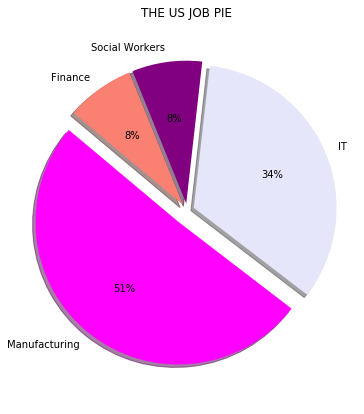

In [5]:
# pie chart job nation wide
fig, ax = plt.subplots(figsize=(6, 7), subplot_kw=dict(aspect="equal"))
pie_labels = ['Manufacturing','IT' ,'Social Workers', 'Finance']
pie_size = [total_manufacturing, total_it, total_social_workers, total_finance]
pie_colors = ["magenta", "lavender", "purple", "salmon"]
pie_explode = (0.1, 0.05, 0.05, 0.05)
plt.pie(pie_size, explode=pie_explode, labels=pie_labels, colors=pie_colors,
        autopct="%1.0f%%", shadow=True, startangle=140)
plt.axis("equal")
ax.set_title("THE US JOB PIE")
fig.savefig('THE US JOB PIE')
plt.show()


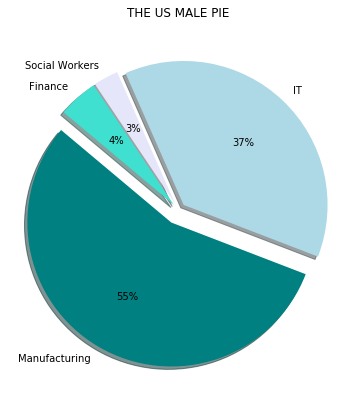

In [6]:
# male pie chart job nation wide
fig, ax = plt.subplots(figsize=(6, 7), subplot_kw=dict(aspect="equal"))
pie_labels = ['Manufacturing','IT' ,'Social Workers', 'Finance']
pie_size = [total_manufacturing_male, total_it_male, total_social_male, total_finance_male]
pie_colors = ["teal", "lightblue", "lavender", "turquoise"]
pie_explode = (0.1, 0.05, 0.05, 0.05)
plt.pie(pie_size, explode=pie_explode, labels=pie_labels, colors=pie_colors,
        autopct="%1.0f%%", shadow=True, startangle=140)
plt.axis("equal")
ax.set_title("THE US MALE PIE")
fig.savefig('THE US MALE PIE')
plt.show()

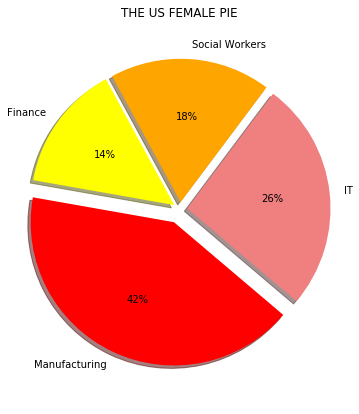

In [7]:
# female pie chart job nation wide
fig, ax = plt.subplots(figsize=(6, 7), subplot_kw=dict(aspect="equal"))
pie_labels = ['Manufacturing','IT' ,'Social Workers', 'Finance']
pie_size = [total_manufacturing_female, total_it_female, total_social_female, total_finance_female]
pie_colors = ["red", "lightcoral", "orange", "yellow"]
pie_explode = (0.1, 0.05, 0.05, 0.05)
plt.pie(pie_size, explode=pie_explode, labels=pie_labels, colors=pie_colors,
        autopct="%1.0f%%", shadow=True, startangle=170)
plt.axis("equal")
ax.set_title("THE US FEMALE PIE")
fig.savefig('THE US FEMALE PIE')
plt.show()

17763206.0


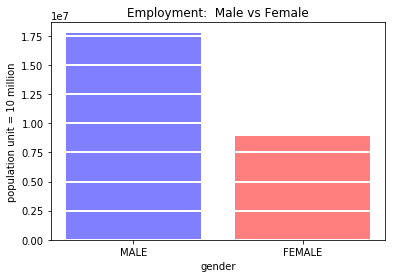

In [8]:
# male vs female bar chart
total_male = df_chart["Male"].sum()
print(total_male)
total_female = df_chart["Female"].sum()
male_female = [total_male,total_female]
male_female_axis = np.arange(2)
plt.bar(male_female_axis, male_female, color=['b','r'], alpha=0.5, align="center")
tick_locations = [value for value in male_female_axis]
plt.xticks(tick_locations, ["MALE","FEMALE"])
plt.title("Employment:  Male vs Female")
plt.xlabel("gender")
plt.grid(axis="y",color = 'w',linewidth = 2)
plt.ylabel("population unit = 10 million")
plt.savefig('Male vs Female')
plt.show()

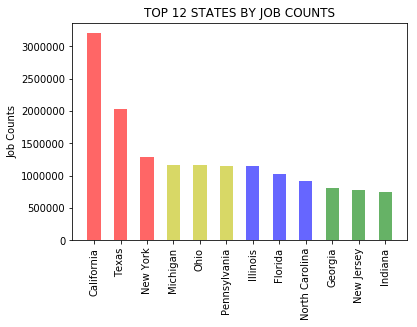

In [9]:
# sort the state by the employment value
df_chart_states = df_chart.groupby("State Name").sum()
df_alljob_state = df_chart_states.sort_values(by="Total",ascending = False).head(12)
df_alljob_state
# top 12 state total ----[int]
y_total_state = df_alljob_state["Total"].tolist()

# top 12 state total labels ----[str]
x_total_state = df_alljob_state.index.values.tolist()

plt.bar(x_total_state, y_total_state, color=['r','r','r','y','y','y','b','b','b','g','g','g'], alpha=0.6, align="center",width= 0.5)
plt.xticks(rotation = 'vertical')
plt.title("TOP 12 STATES BY JOB COUNTS")
plt.ylabel("Job Counts")
plt.savefig("Top States Job Counts")
plt.show()






<function matplotlib.pyplot.show(*args, **kw)>

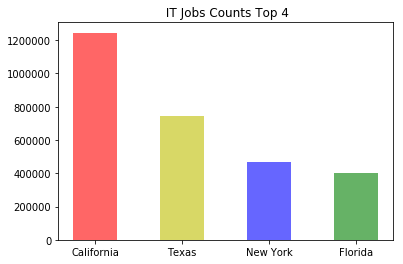

In [22]:
# top 4 states for each industry
df_chart_manu = df_chart[df_chart['Type']=='Manufacturing'].sort_values(["Total"],ascending = False)
df_chart_it = df_chart[df_chart['Type']=='IT'].sort_values(["Total"],ascending = False)
df_chart_sw = df_chart[df_chart['Type']=='Social Workers'].sort_values(["Total"],ascending = False)
df_chart_finance = df_chart[df_chart['Type']=='Finance'].sort_values(["Total"],ascending = False)
y_it_state = df_chart_it["Total"].head(4).tolist()
x_it_state = df_chart_it["State Name"].head(4).tolist()

plt.bar(x_it_state, y_it_state, color=['r','y','b','g'], alpha=0.6, align="center",width= 0.5)
plt.xticks(rotation = 'horizontal')

plt.title(" IT Jobs Counts Top 4")
plt.savefig("IT_STATE")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

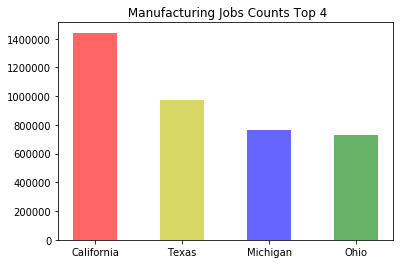

In [23]:
y_manu_state = df_chart_manu["Total"].head(4).tolist()
x_manu_state = df_chart_manu["State Name"].head(4).tolist()

plt.bar(x_manu_state, y_manu_state, color=['r','y','b','g'], alpha=0.6, align="center",width= 0.5)
plt.xticks(rotation = 'horizontal')
plt.title(" Manufacturing Jobs Counts Top 4")
plt.savefig("MANU_STATE")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

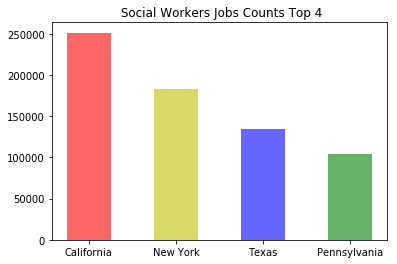

In [24]:
y_sw_state = df_chart_sw["Total"].head(4).tolist()
x_sw_state = df_chart_sw["State Name"].head(4).tolist()

plt.bar(x_sw_state, y_sw_state, color=['r','y','b','g'], alpha=0.6, align="center",width= 0.5)
plt.xticks(rotation = 'horizontal')
plt.title(" Social Workers Jobs Counts Top 4")
plt.savefig("SW_STATE")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

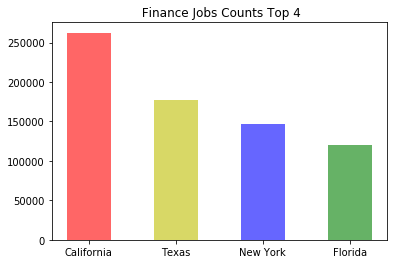

In [25]:
y_finance_state = df_chart_finance["Total"].head(4).tolist()
x_finance_state = df_chart_finance["State Name"].head(4).tolist()

plt.bar(x_finance_state, y_finance_state, color=['r','y','b','g'], alpha=0.6, align="center",width= 0.5)
plt.xticks(rotation = 'horizontal')
plt.title(" Finance Jobs Counts Top 4")
plt.savefig("FINANCE_STATE")
plt.show